# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [1]:
# install slim version (default)
!pip install pycaret

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

**Install Analysis Extras for Explainable AI**

In [3]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

Data The dataset analyzed is on wine samples, classified into three classes, Classes 1, 2, and 3. These were gathered from the chemical analysis carried out on wines grown in the same region of Italy but originating from three different cultivars. The measurements are taken regarding various physicochemical characteristics quantifying the properties of wines.

This is a multivariate dataset and should be well-suited for classification and clustering analysis. The dataset represents a suitable playground for applying machine learning techniques because some class separability may allow certain robust exploratory and predictive models to be built.

Attribute Information:

There are 13 real-valued continuous features that represent the chemical and physical properties of wines, namely:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash (Acl)
5. Magnesium (Mg)
6. Total phenols (Phenols)
7. Flavanoids
8. Non-flavonoid phenols (Nonflavanoid.phenols)
9. Proanthocyanins (Proanth)
10. Color intensity (Color.int)
11. Hue
12. OD280/OD315 of diluted wines (OD)
13. Proline

https://archive.ics.uci.edu/dataset/109/wine

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head(25)

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0      1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1      1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2      1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3      1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4      1    13.24        2.59  2.87  21.0  118     2.80        2.69   
5      1    14.20        1.76  2.45  15.2  112     3.27        3.39   
6      1    14.39        1.87  2.45  14.6   96     2.50        2.52   
7      1    14.06        2.15  2.61  17.6  121     2.60        2.51   
8      1    14.83        1.64  2.17  14.0   97     2.80        2.98   
9      1    13.86        1.35  2.27  16.0   98     2.98        3.15   
10     1    14.10        2.16  2.30  18.0  105     2.95        3.32   
11     1    14.12        1.48  2.32  16.8   95     2.20        2.43   
12     1    13.75        1.73  2.41  16.0   89     2.60        2.76   
13     1    14.75        1.73  2.39  11.4   91     3.10        3.69   
14     1    14.38        1.87  2.38  12.0  102     3.30        3.64   
15     1    13.63        1.81  2.70  17.2  112     2.85        2.91   
16     1    14.30        1.92  2.72  20.0  120     2.80        3.14   
17     1    13.83        1.57  2.62  20.0  115     2.95        3.40   
18     1    14.19        1.59  2.48  16.5  108     3.30        3.93   
19     1    13.64        3.10  2.56  15.2  116     2.70        3.03   
20     1    14.06        1.63  2.28  16.0  126     3.00        3.17   
21     1    12.93        3.80  2.65  18.6  102     2.41        2.41   
22     1    13.71        1.86  2.36  16.6  101     2.61        2.88   
23     1    12.85        1.60  2.52  17.8   95     2.48        2.37   
24     1    13.50        1.81  2.61  20.0   96     2.53        2.61   

    Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                   0.28     2.29       5.64  1.04  3.92     1065  
1                   0.26     1.28       4.38  1.05  3.40     1050  
2                   0.30     2.81       5.68  1.03  3.17     1185  
3                   0.24     2.18       7.80  0.86  3.45     1480  
4                   0.39     1.82       4.32  1.04  2.93      735  
5                   0.34     1.97       6.75  1.05  2.85     1450  
6                   0.30     1.98       5.25  1.02  3.58     1290  
7                   0.31     1.25       5.05  1.06  3.58     1295  
8                   0.29     1.98       5.20  1.08  2.85     1045  
9                   0.22     1.85       7.22  1.01  3.55     1045  
10                  0.22     2.38       5.75  1.25  3.17     1510  
11                  0.26     1.57       5.00  1.17  2.82     1280  
12                  0.29     1.81       5.60  1.15  2.90     1320  
13                  0.43     2.81       5.40  1.25  2.73     1150  
14                  0.29     2.96       7.50  1.20  3.00     1547  
15                  0.30     1.46       7.30  1.28  2.88     1310  
16                  0.33     1.97       6.20  1.07  2.65     1280  
17                  0.40     1.72       6.60  1.13  2.57     1130  
18                  0.32     1.86       8.70  1.23  2.82     1680  
19                  0.17     1.66       5.10  0.96  3.36      845  
20                  0.24     2.10       5.65  1.09  3.71      780  
21                  0.25     1.98       4.50  1.03  3.52      770  
22                  0.27     1.69       3.80  1.11  4.00     1035  
23                  0.26     1.46       3.93  1.09  3.63     1015  
24                  0.28     1.66       3.52  1.12  3.82      845

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

The Wine column is renamed to class for clarity, and its data type is converted to categorical for easier plotting. A pairplot is generated using **Seaborn**, with **hue='class'** to distinguish classes.


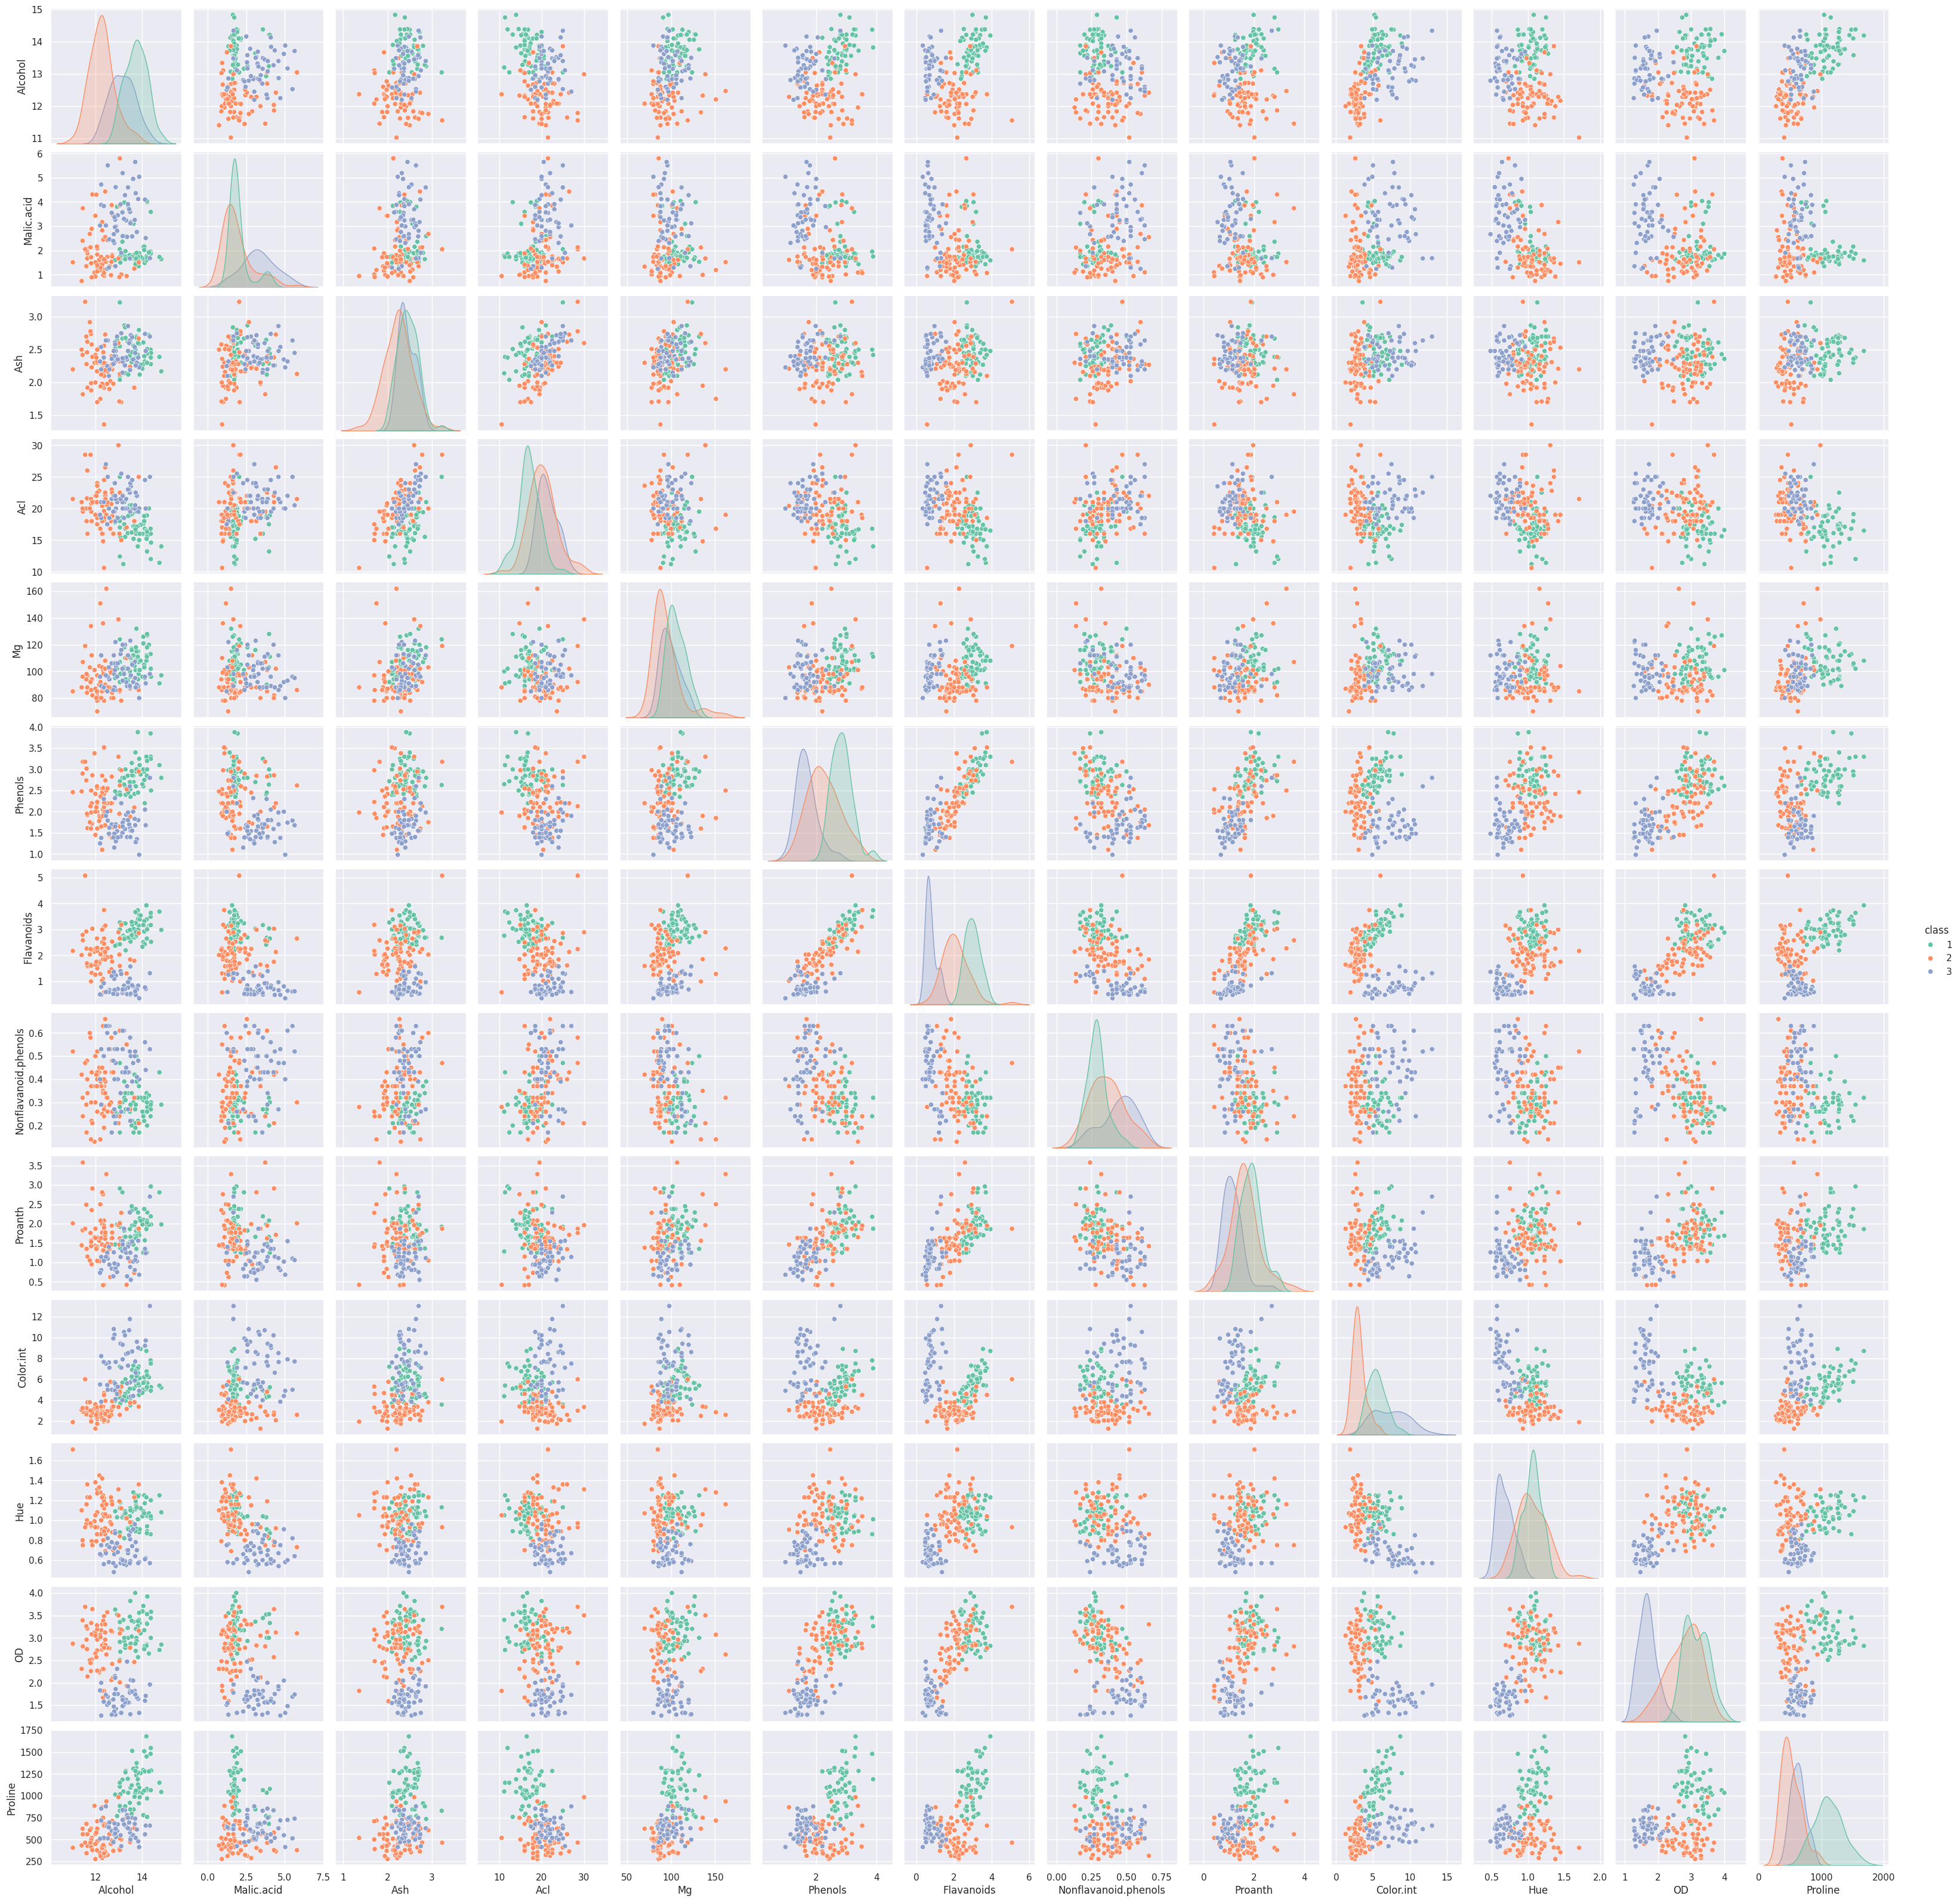

In [9]:
# Rename the 'Wine' column to 'class' for clarity
df.rename(columns={'Wine': 'class'}, inplace=True)

# Convert the 'class' column to categorical
df['class'] = df['class'].astype('category')

# Create the pairplot
sns.pairplot(df, hue='class', diag_kind='kde', palette='Set2')
plt.show()

**Feature Selection Using PCA Loadings**

Feature selection was performed based on the contributions to principal components for the optimization of the dataset. The **class** column was set as a target variable, and all the other columns were set as features. **StandardScaler** was used for scaling up the dataset. Afterwards, PCA was done to compute feature loadings relative to the two principal components-PC1 and PC2. The total impact of every feature was computed as the sum of the absolute values of its contributions with respect to PC1 and PC2.

Features with low impact were dropped: **Nonflavanoid.phenols, Proanth, Acl, Ash, Mg, Malic.acid, Color.int, Hue**. The dataset was reduced accordingly. After scaling the reduced dataset, PCA was reapplied to make sure that the cumulative variance explained by the first two components was high enough, equal to 0.86, which supports the effectiveness of this dimensionality reduction.

In [10]:
# Define features and target
X_full = df.drop(columns=['class'])
y = df['class']
print(X_full.head(10))

# Justification for Dropping Features (PCA Loadings)
X_full_scaled = StandardScaler().fit_transform(X_full)
pca_full = PCA()
pca_full.fit(X_full_scaled)

loadings_full = pd.DataFrame(
    pca_full.components_.T[:, :2],  # Contributions to PC1 and PC2
    columns=['PC1', 'PC2'],
    index=X_full.columns
)
loadings_full['Total_Impact'] = loadings_full[['PC1', 'PC2']].abs().sum(axis=1)

print("Feature Contributions (Full Dataset):")
print(loadings_full.sort_values(by='Total_Impact', ascending=True))

# Drop low-impact features
features_to_drop = ['Nonflavanoid.phenols', 'Proanth', 'Acl', 'Ash', 'Mg', 'Malic.acid', 'Color.int', 'Hue']
X_reduced = X_full.drop(columns=features_to_drop)

# Standardize reduced dataset
X_reduced_scaled = StandardScaler().fit_transform(X_reduced)
X = pd.DataFrame(X_reduced_scaled, columns=X_reduced.columns)  # Replace X with reduced data
variables = list(X.columns)

# Verify the cumulative variance for PC1 and PC2
pca_reduced = PCA()
pca_reduced.fit(X_reduced_scaled)
cumulative_variance = pca_reduced.explained_variance_ratio_[:2].sum()
print(f"Cumulative Variance (First 2 Components, Reduced Dataset): {cumulative_variance:.2f}")


   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   
5    14.20        1.76  2.45  15.2  112     3.27        3.39   
6    14.39        1.87  2.45  14.6   96     2.50        2.52   
7    14.06        2.15  2.61  17.6  121     2.60        2.51   
8    14.83        1.64  2.17  14.0   97     2.80        2.98   
9    13.86        1.35  2.27  16.0   98     2.98        3.15   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24    

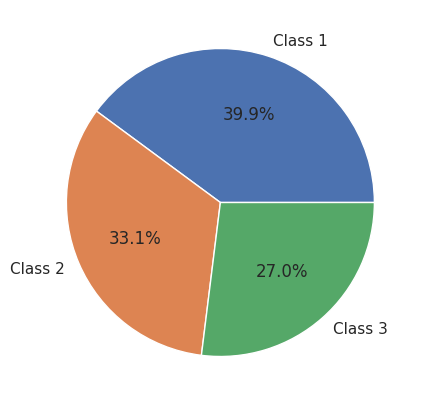

In [11]:
# Class distribution visualization
y.value_counts().plot(kind='pie', labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%')
plt.ylabel('')
plt.show()

**Pair Plot Visualization After Feature Reduction**

A pair plot was done to visualize the relationships among the reduced features and their separation by class. This would allow an assessment of how effectively feature reduction is able to distinguish between target categories.

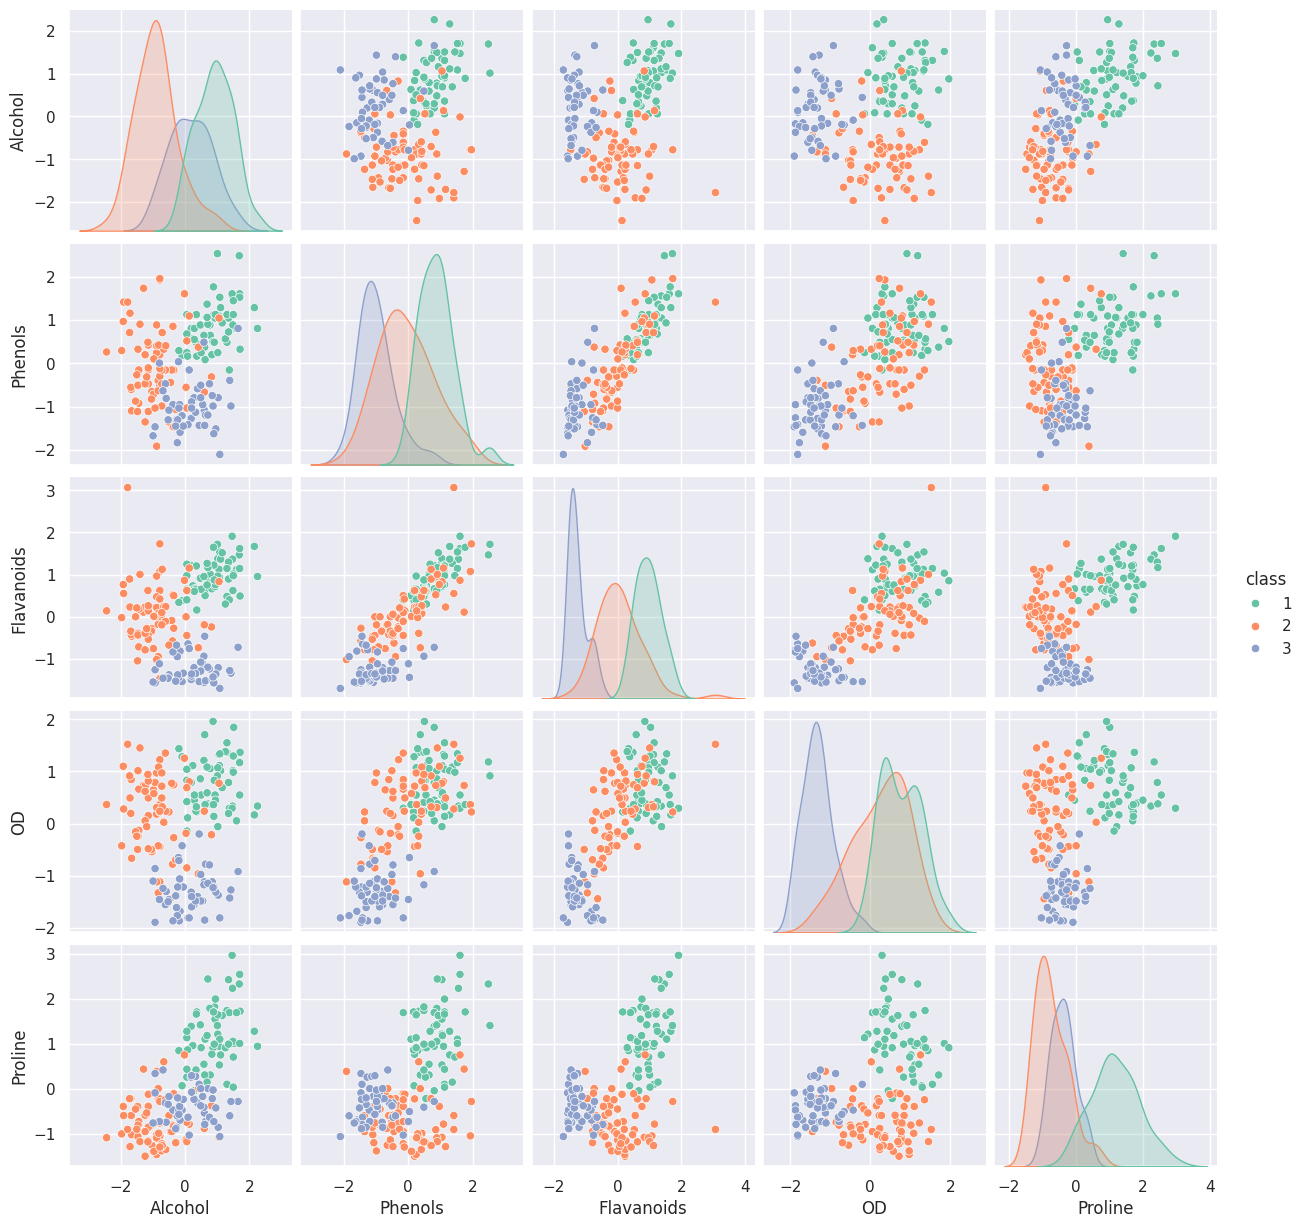

In [12]:
# Pair plot after feature reduction
sns.pairplot(pd.concat([X, y], axis=1), hue='class', diag_kind='kde', palette='Set2')
plt.show()

**Data Matrix**

In [13]:
print("First 10 rows of the modified data (reduced and standardized):")
print(X.head(10))

First 10 rows of the modified data (reduced and standardized):
    Alcohol   Phenols  Flavanoids        OD   Proline
0  1.518613  0.808997    1.034819  1.847920  1.013009
1  0.246290  0.568648    0.733629  1.113449  0.965242
2  0.196879  0.808997    1.215533  0.788587  1.395148
3  1.691550  2.491446    1.466525  1.184071  2.334574
4  0.295700  0.808997    0.663351  0.449601 -0.037874
5  1.481555  1.562093    1.366128  0.336606  2.239039
6  1.716255  0.328298    0.492677  1.367689  1.729520
7  1.308617  0.488531    0.482637  1.367689  1.745442
8  2.259772  0.808997    0.954502  0.336606  0.949319
9  1.061565  1.097417    1.125176  1.325316  0.949319


In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Alcohol     178.0 -8.382808e-16  1.002821 -2.434235 -0.788245  0.061000   
Phenols     178.0  0.000000e+00  1.002821 -2.107246 -0.885468  0.095960   
Flavanoids  178.0 -3.991813e-16  1.002821 -1.695971 -0.827539  0.106150   
OD          178.0  3.193450e-16  1.002821 -1.895054 -0.952248  0.237735   
Proline     178.0 -1.596725e-16  1.002821 -1.493188 -0.784638 -0.233720   

                 75%       max  
Alcohol     0.836129  2.259772  
Phenols     0.808997  2.539515  
Flavanoids  0.849085  3.062832  
OD          0.788587  1.960915  
Proline     0.758249  2.971473

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(X.columns)

**Box and Whisker Plots**

[Text(0, 0, 'Alcohol'),
 Text(1, 0, 'Phenols'),
 Text(2, 0, 'Flavanoids'),
 Text(3, 0, 'OD'),
 Text(4, 0, 'Proline')]

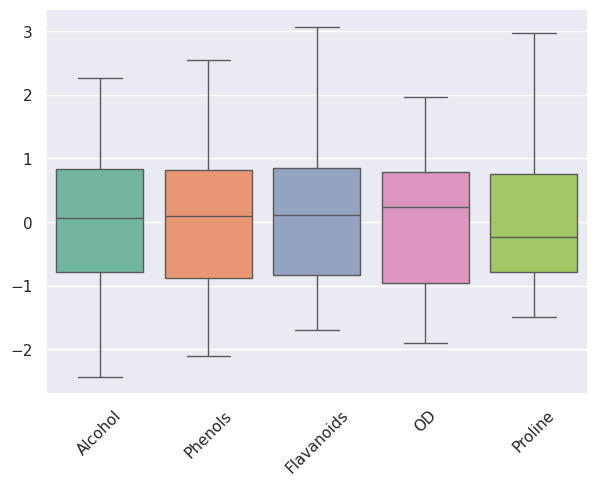

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Alcohol'),
 Text(1, 0, 'Phenols'),
 Text(2, 0, 'Flavanoids'),
 Text(3, 0, 'OD'),
 Text(4, 0, 'Proline')]

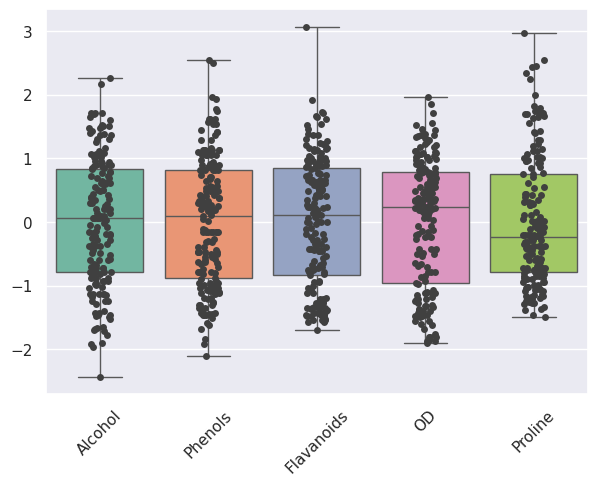

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

**Correlation Matrix**

[Text(0.5, 1, 'Alcohol'),
 Text(1.5, 1, 'Phenols'),
 Text(2.5, 1, 'Flavanoids'),
 Text(3.5, 1, 'OD'),
 Text(4.5, 1, 'Proline')]

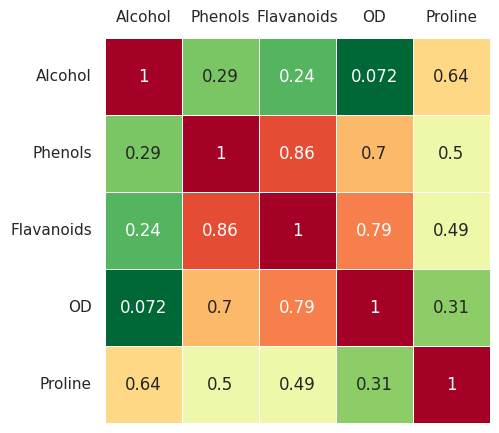

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

##**Applying PCA**

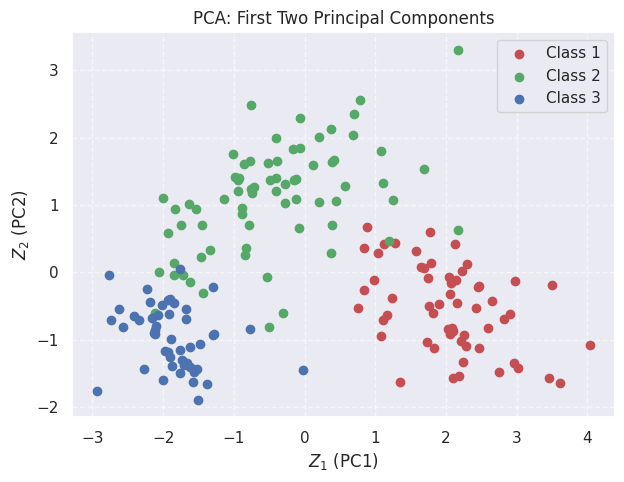

In [20]:
# PCA Transformation
pca = PCA()
Z = pca.fit_transform(X)

# Index rows for each class
idx_Class1 = np.where(y == 1)
idx_Class2 = np.where(y == 2)
idx_Class3 = np.where(y == 3)

# Scatter plot for PCA components
plt.figure()
plt.scatter(Z[idx_Class1, 0], Z[idx_Class1, 1], c='r', label='Class 1')
plt.scatter(Z[idx_Class2, 0], Z[idx_Class2, 1], c='g', label='Class 2')
plt.scatter(Z[idx_Class3, 0], Z[idx_Class3, 1], c='b', label='Class 3')
plt.legend()
plt.title('PCA: First Two Principal Components')
plt.xlabel('$Z_1$ (PC1)')
plt.ylabel('$Z_2$ (PC2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Eigenvectors**

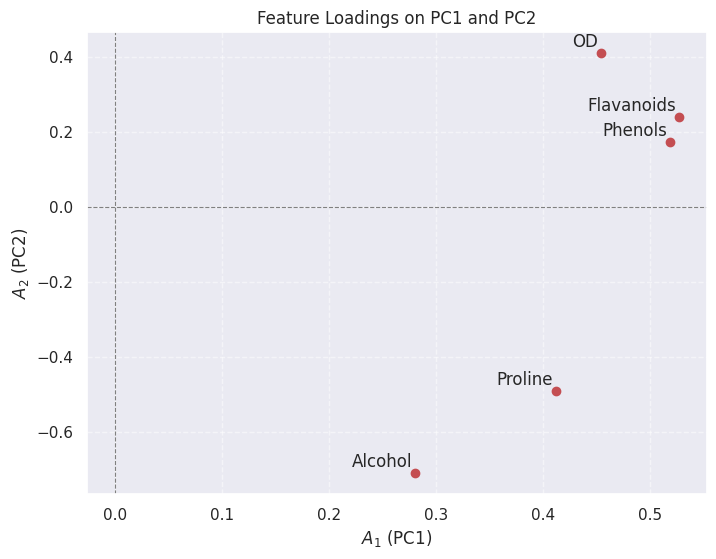

In [21]:
A = pca.components_.T

# Scatter plot of contributions to PC1 and PC2
plt.figure(figsize=(8, 6))
plt.scatter(A[:, 0], A[:, 1], c='r')
plt.xlabel('$A_1$ (PC1)')
plt.ylabel('$A_2$ (PC2)')

# Annotate each feature
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-2, 2),
        textcoords='offset points',
        ha='right',
        va='bottom'
    )
plt.title('Feature Loadings on PC1 and PC2')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

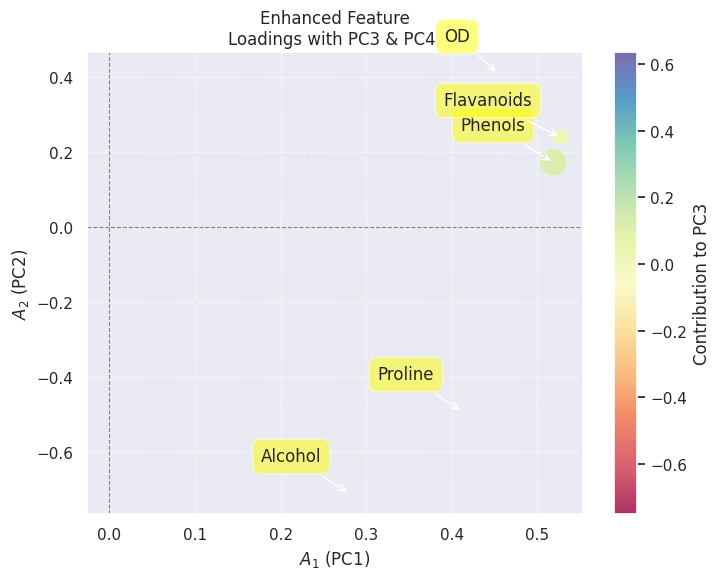

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(
    A[:, 0], A[:, 1],
    marker='o',
    c=A[:, 2] if A.shape[1] > 2 else 0,  # Use PC3 if available; otherwise, constant color
    s=(A[:, 3] if A.shape[1] > 3 else 1) * 500,  # Size for PC4 if available; fallback to constant
    cmap=plt.get_cmap('Spectral'),
    alpha=0.8
)
plt.xlabel('$A_1$ (PC1)')
plt.ylabel('$A_2$ (PC2)')

# Annotate each feature with bounding box
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords='offset points',
        ha='right',
        va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )
plt.title('Enhanced Feature\nLoadings with PC3 & PC4 ')
plt.colorbar(label='Contribution to PC3')  # Colorbar for PC3
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

**Scree plot**

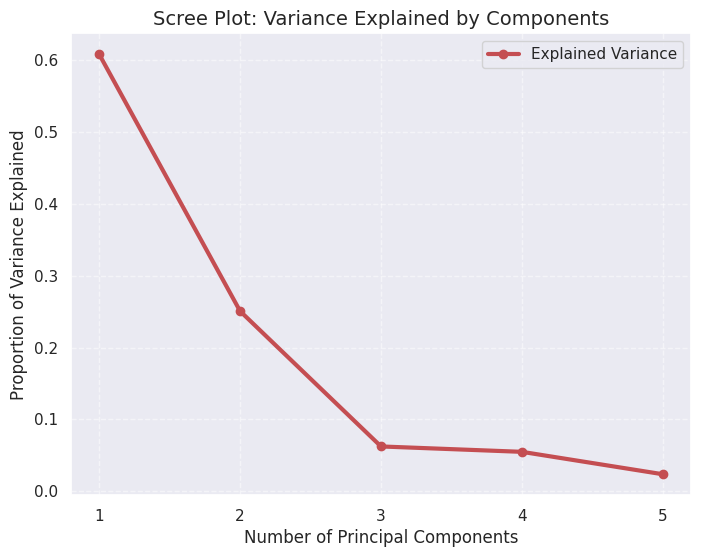

In [23]:
# Eigenvalues
Lambda = pca.explained_variance_

# Scree plot
x = np.arange(len(Lambda)) + 1  # Component numbers
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(x, Lambda / sum(Lambda), 'ro-', lw=3, label='Explained Variance')  # Variance per component
plt.xticks(x, [str(i) for i in x], rotation=0)  # Set component numbers on x-axis
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.title('Scree Plot: Variance Explained by Components', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')  # Add grid for clarity
plt.legend()
plt.show()

**Explained Variance**

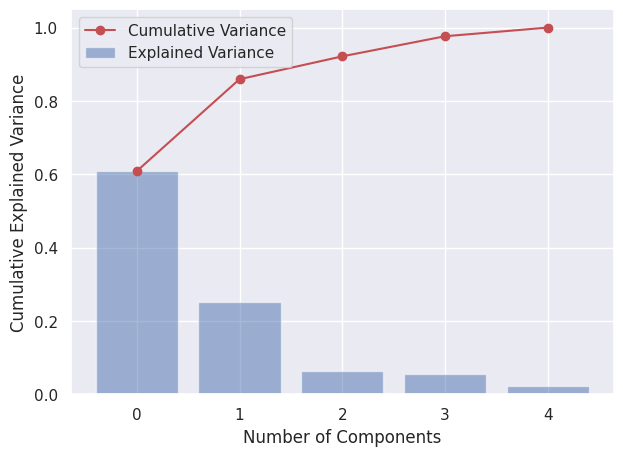

In [24]:
# Explained variance and cumulative variance for reduced data
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))  # Component indices

# Create bar plot for explained variance
plt.bar(ind, ell, align='center', alpha=0.5, label='Explained Variance')

# Add line plot for cumulative variance
plt.plot(np.cumsum(ell), marker='o', color='r', label='Cumulative Variance')

# Formatting the plot
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()


**Biplot**

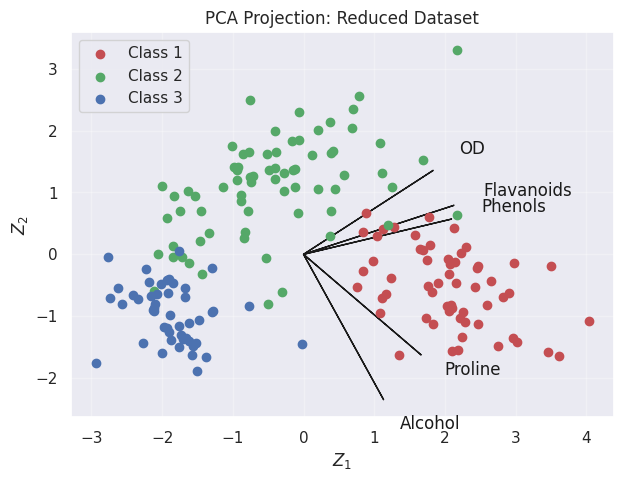

In [25]:
# Extract principal components and transformed data
A = pca.components_.T  # Ensure this is from the reduced PCA model
Z = pca.transform(X)  # Transformed data from reduced features

# Define PC1, PC2 loadings and PCA-transformed axes
A1 = A[:, 0]  # Loadings for PC1
A2 = A[:, 1]  # Loadings for PC2
Z1 = Z[:, 0]  # Transformed data for PC1
Z2 = Z[:, 1]  # Transformed data for PC2

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

# Arrows to project features as vectors onto PC axes
for i in range(len(A1)):
    plt.arrow(0, 0, A1[i] * max(Z1), A2[i] * max(Z2), color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i] * max(Z1) * 1.2, A2[i] * max(Z2) * 1.2, variables[i], color='k')

# Scatter plot for PCA-transformed data with class labels
plt.scatter(Z[idx_Class1, 0], Z[idx_Class1, 1], c='r', label='Class 1')
plt.scatter(Z[idx_Class2, 0], Z[idx_Class2, 1], c='g', label='Class 2')
plt.scatter(Z[idx_Class3, 0], Z[idx_Class3, 1], c='b', label='Class 3')
plt.legend(loc='upper left')
plt.title('PCA Projection: Reduced Dataset')
plt.grid(alpha=0.3)
plt.show()


##**Using PCA Library**

In [26]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.0 which is incompatible.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3       PC4
0    2.645453 -0.431346  0.578766 -0.972389
1    1.652720  0.080765 -0.331747 -0.490853
2    2.046857 -0.071761 -0.700625 -0.062554
3    4.036566 -1.082082 -0.207617  0.435203
4    1.040014  0.291093  0.380401  0.272389
..        ...       ...       ...       ...
173 -1.583269 -1.626466  0.264972 -0.076244
174 -1.619133 -1.407716 -0.016323  0.296078
175 -1.758891 -1.499124 -0.359514  0.055148
176 -1.703952 -1.370373 -0.426885  0.061285
177 -1.376855 -1.655921  1.063172  0.490968

[178 rows x 4 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.8% expl.var)', ylabel='PC2 (25.0% expl.var)'>)

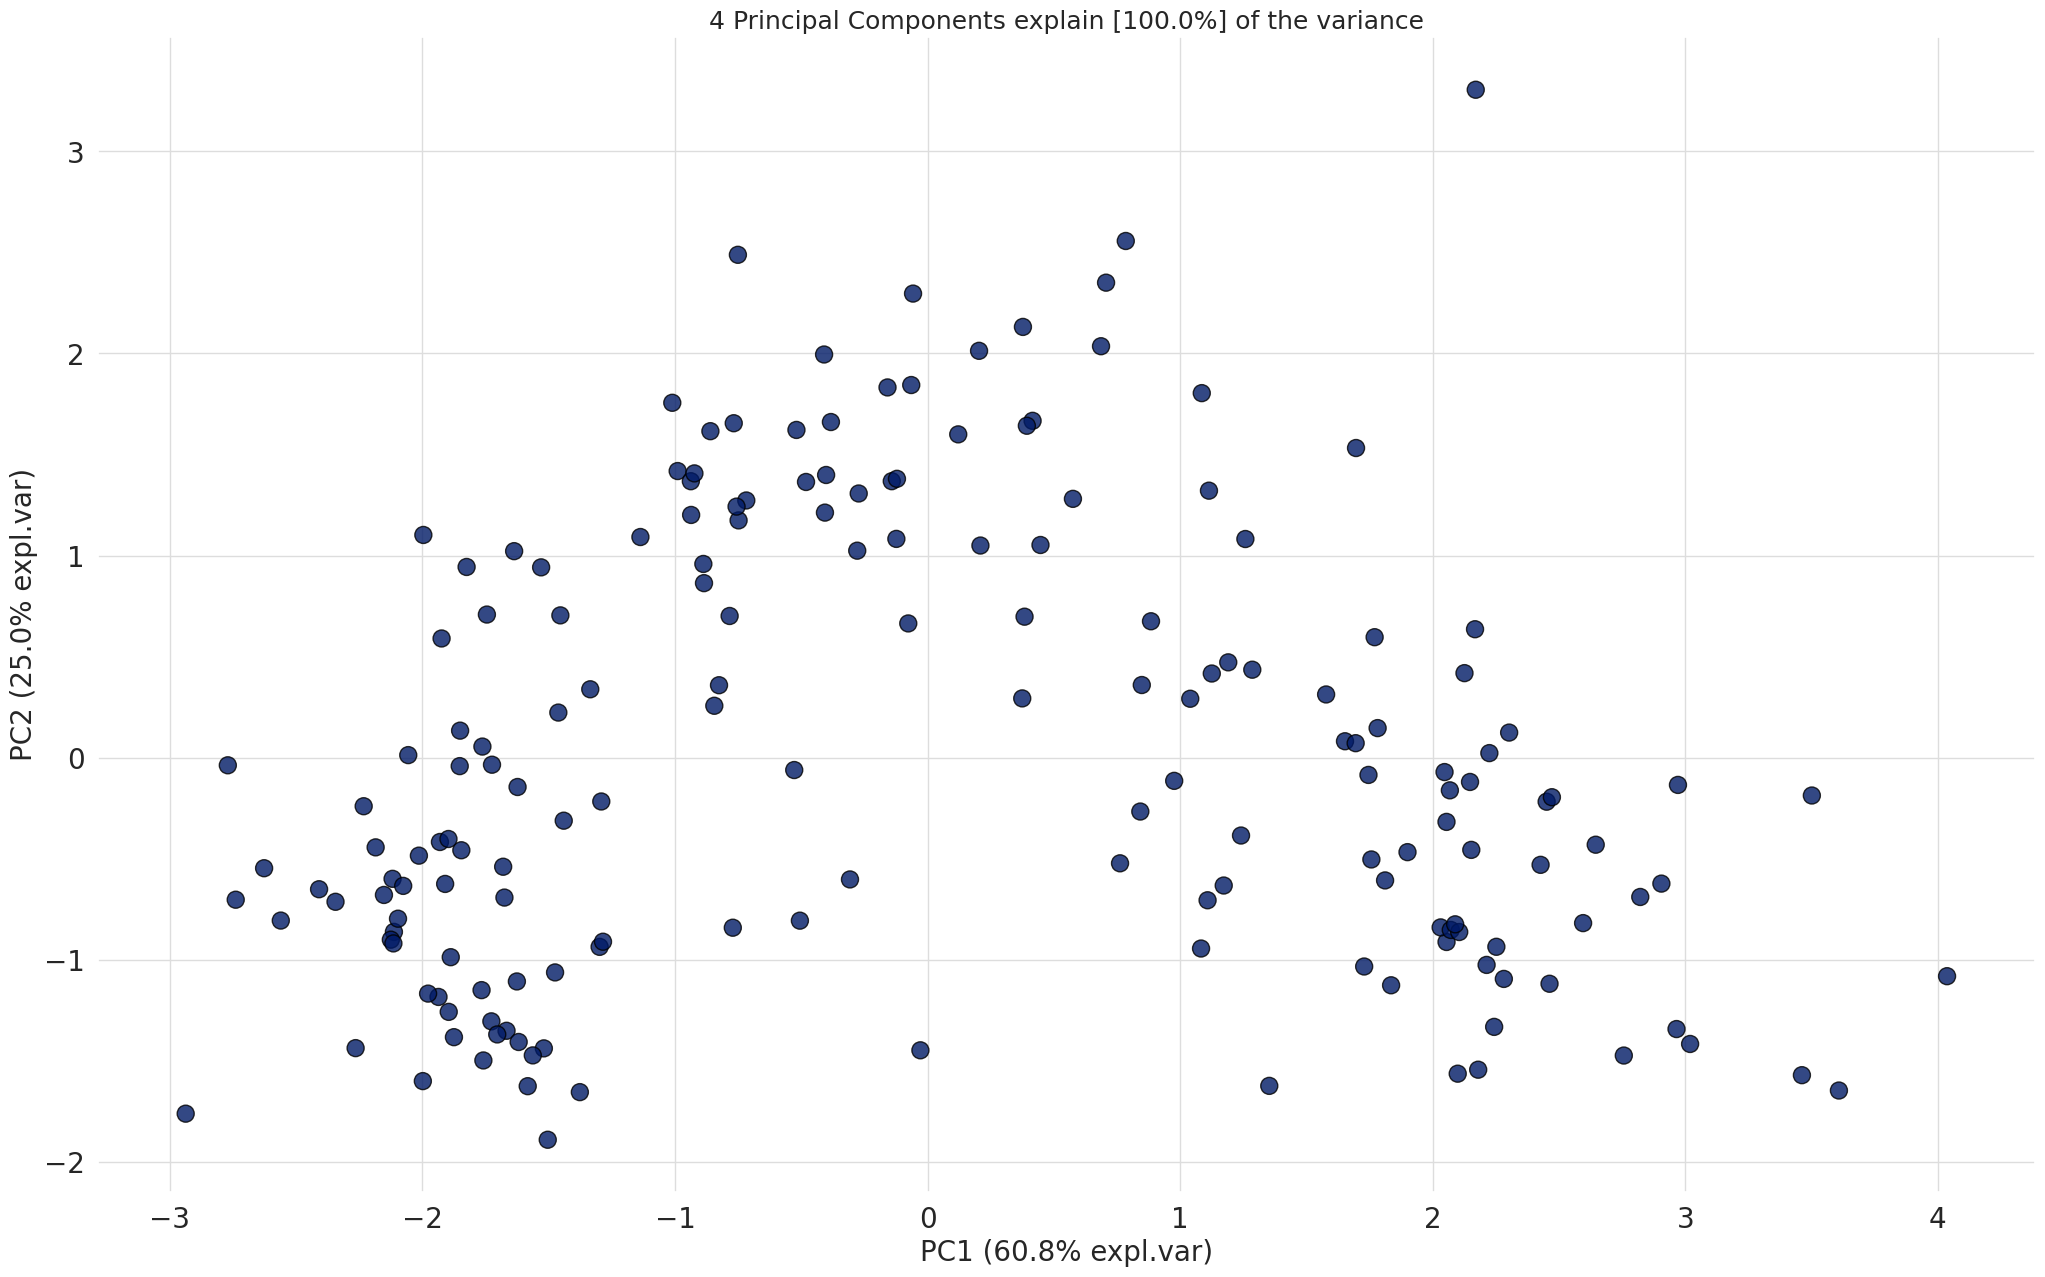

In [29]:
# PCA-transformed scatter plot
model.scatter(label=True, legend=False)  # This uses the reduced dataset 'X' by default

**Eigenvectors**

In [30]:
A = out['loadings'].T
# Transpose loadings to match variables


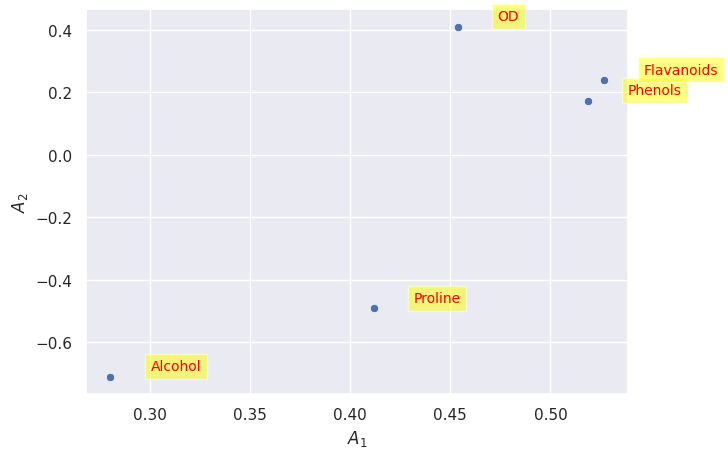

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

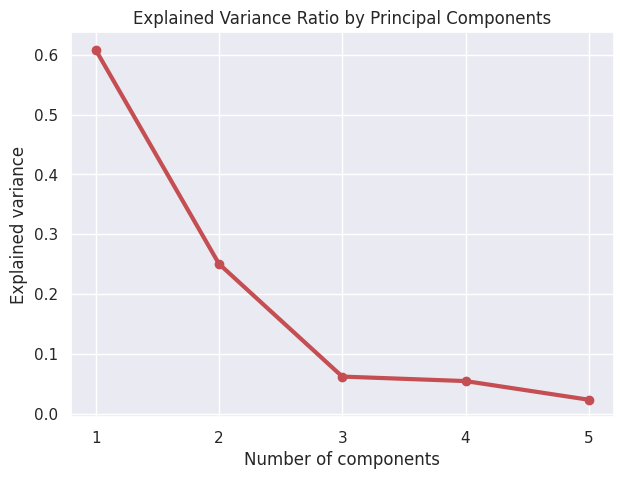

In [32]:
# Variance ratio for reduced dataset
VR = out['variance_ratio']  # Ensure 'out' is from PCA applied to reduced data (X)

# Scree plot for explained variance ratio
x = np.arange(len(VR)) + 1  # Component indices
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, ["" + str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.title('Explained Variance Ratio by Principal Components')
plt.ylabel('Explained variance')


**Explained Variance Plot**

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 4 Principal Components explain [100.0%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

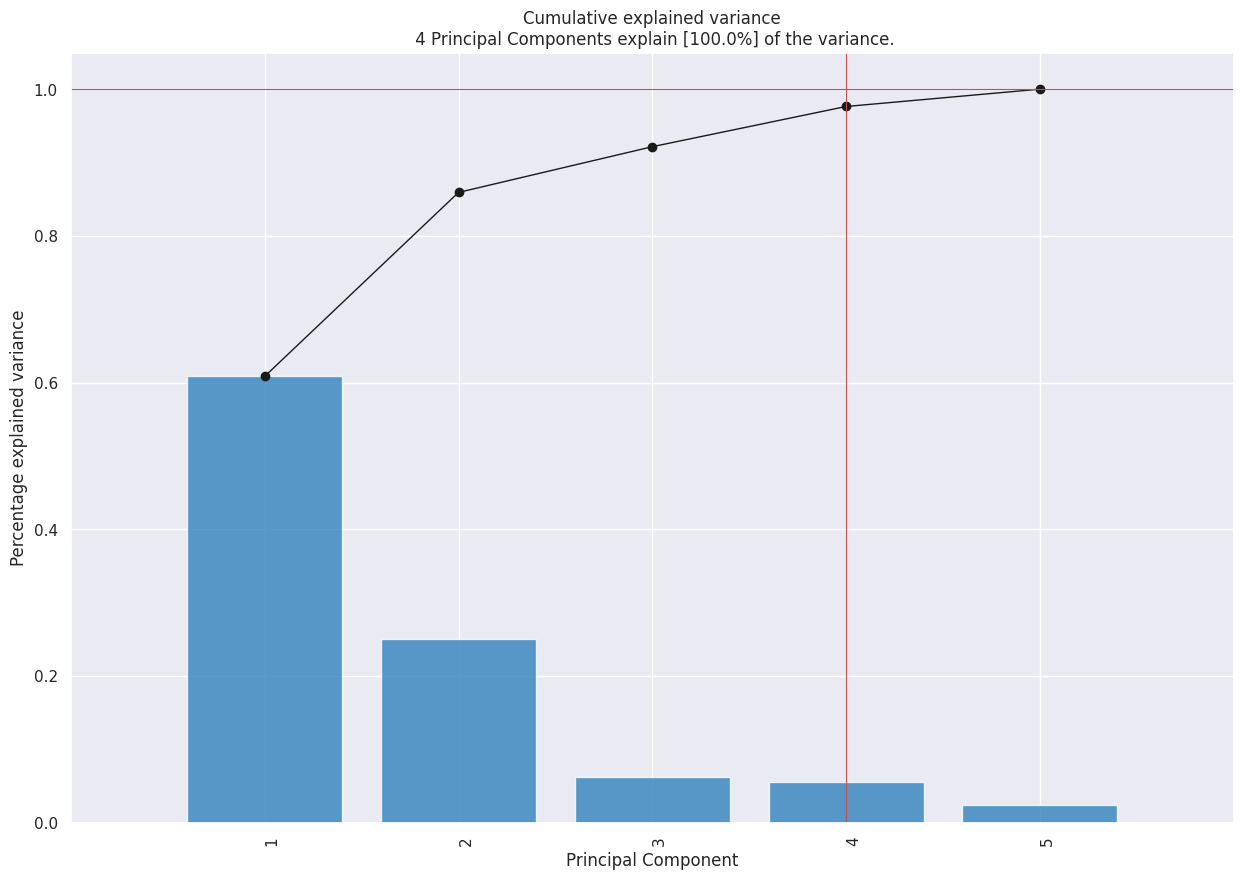

In [34]:
# Ensure the model is fitted on the reduced dataset
model = pca()
out = model.fit_transform(X)  # X is the reduced dataset

# Generate the explained variance plot
model.plot()

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (60.8% expl.var)', ylabel='PC2 (25.0% expl.var)'>)

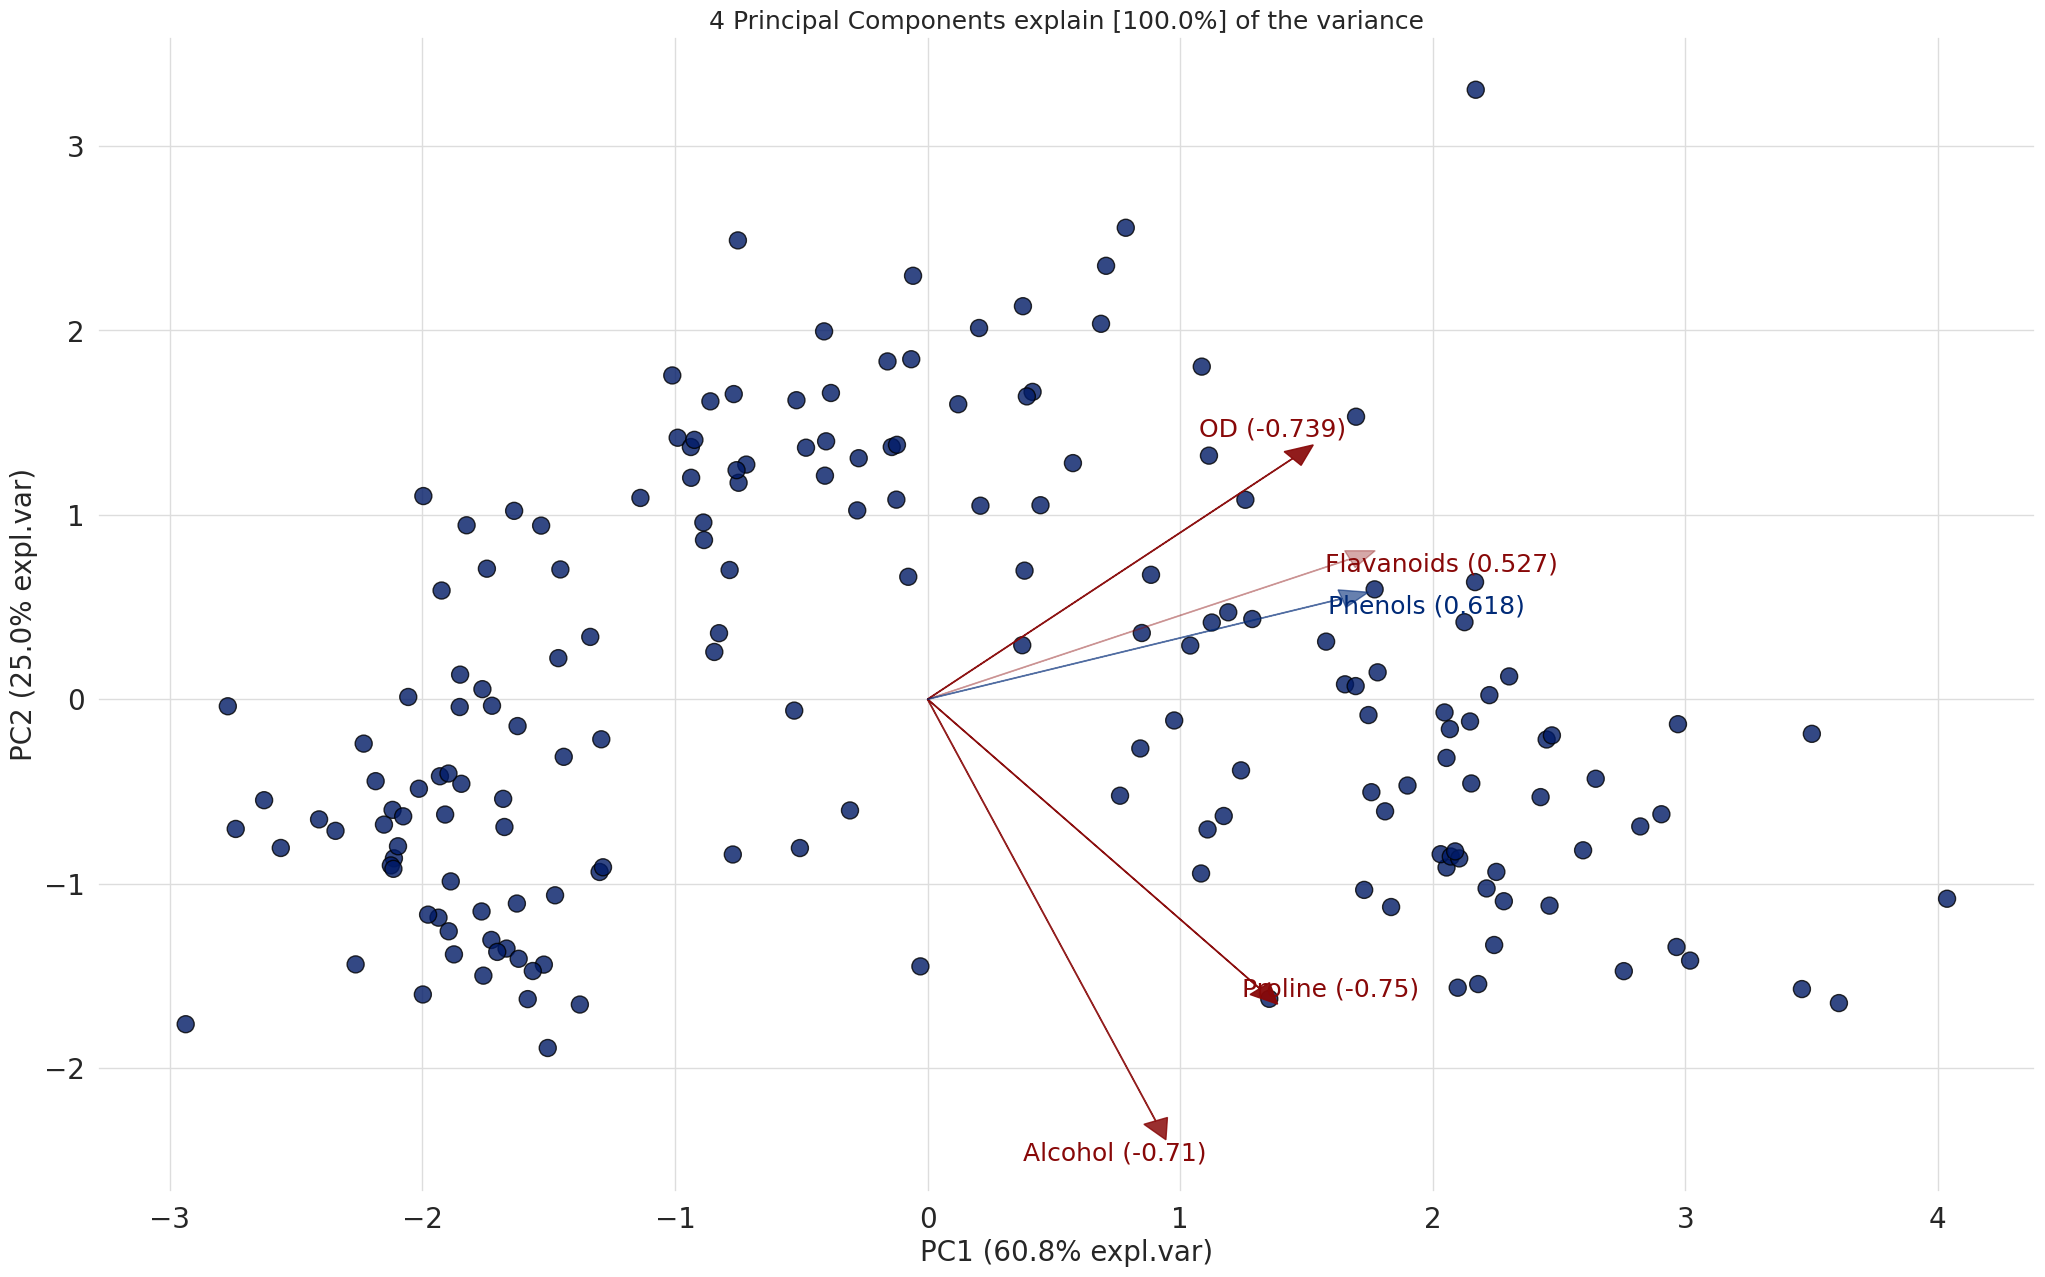

In [35]:
model = pca()
out = model.fit_transform(X)  # X is the reduced dataset after feature dropping
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [36]:
# Ensure proper assignment of class column
y = df['class']  # Extract the target variable
data = X.sample(frac=0.9, random_state=786)  # Sample 90% for training
data_unseen = X.drop(data.index)  # Remaining 10% for unseen data

# Reset indices for both datasets
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# Align and assign the target variable to the datasets
data['class'] = y.iloc[data.index].values
data_unseen['class'] = y.iloc[data_unseen.index].values

# Drop rows with missing target values, if any
data.dropna(subset=['class'], inplace=True)
data_unseen.dropna(subset=['class'], inplace=True)

# Verify class distribution
print("Class distribution in training data:")
print(data['class'].value_counts())

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Class distribution in training data:
class
2    71
1    59
3    30
Name: count, dtype: int64
Data for Modeling: (160, 6)
Unseen Data For Predictions: (18, 6)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [37]:
# PyCaret setup and model comparison
from pycaret.classification import setup, compare_models
from pycaret.classification import *
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pycaret.classification import setup, compare_models, tune_model, evaluate_model
from sklearn.model_selection import cross_val_score

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=123)
X_smote, y_smote = smote.fit_resample(X, y)

# Setup PyCaret with balanced data
clf = setup(data=pd.concat([pd.DataFrame(X_smote, columns=X.columns),
                            pd.DataFrame(y_smote, columns=['class'])], axis=1),
            target='class', session_id=123, train_size=0.7)


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [38]:
# Compare and find the best model
best_model = compare_models()


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [39]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [40]:
dt = create_model('dt')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
#trained model object is stored in the variable 'dt'.
best_model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [44]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

How to analyze model performance using various plots

In [46]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [50]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [51]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate K Neighbors Model**

In [52]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [53]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [55]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [56]:
tuned_lr

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [58]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [59]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [60]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
tuned_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [63]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

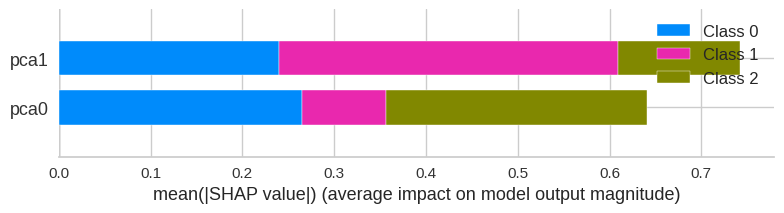

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')